In [1]:
# Importing required modules

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, NELDER_MEAD
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

In [2]:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.neural_networks import EstimatorQNN, SamplerQNN

algorithm_globals.random_seed = 23

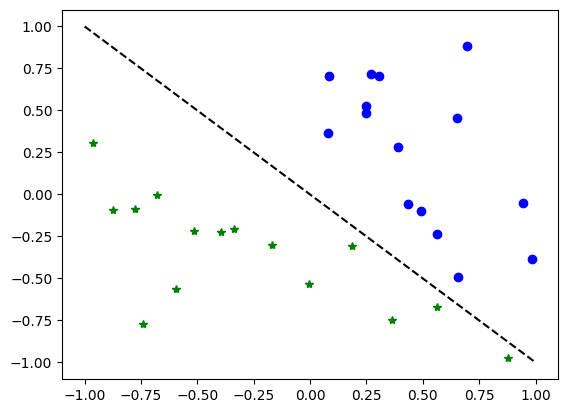

In [3]:
# Dataset preparation 

num_features = 2
num_samples = 30

X = 2*algorithm_globals.random.random([num_samples, num_features]) - 1
y_label = 1*(np.sum(X, axis=1) >= 0)
y = 2*y_label - 1    

y_one_hot = np.zeros((num_samples, 2))

for i in range(num_samples):
    y_one_hot[i, y_label[i]] = 1

for x, y_t in zip(X, y):
    if y_t == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "g*")

plt.plot([-1, 1],[1, -1], "--", color="black")
plt.show()

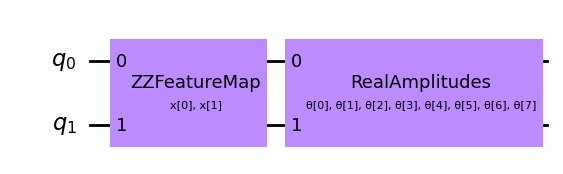

In [4]:
qc = QuantumCircuit(2)
feature_map = ZZFeatureMap(2)
ansatz = RealAmplitudes(2)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw("mpl")

In [5]:
estimator_qnn = EstimatorQNN(circuit =qc, input_params=feature_map.parameters, weight_params=ansatz.parameters)

estimator_qnn.forward(X[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))

array([[-0.56970958]])

In [6]:
from IPython.display import clear_output

In [7]:
objective_values = []

def callback_function(weights, obj_value):
    clear_output(wait=True)
    objective_values.append(obj_value)
    plt.title("Objective value Vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.plot(range(len(objective_values)), objective_values)
    plt.show()

In [8]:
estimator_classifier = NeuralNetworkClassifier(estimator_qnn, optimizer=COBYLA(maxiter=50), callback=callback_function)

In [9]:
X_train = X[:20]
y_train = y[:20]

X_test = X[20:]
y_test = y[20:]

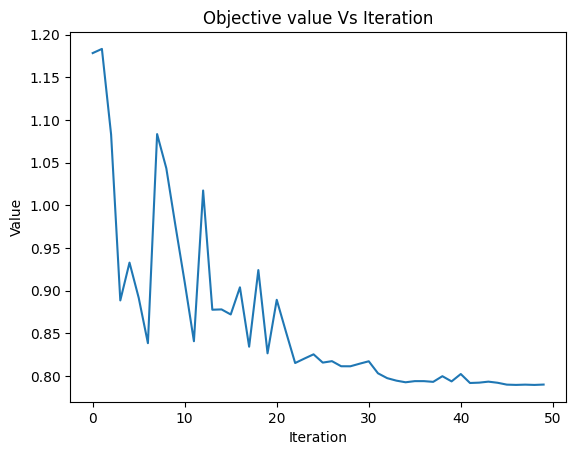

0.65

In [10]:
estimator_classifier.fit(X_train, y_train)
estimator_classifier.score(X_train, y_train)

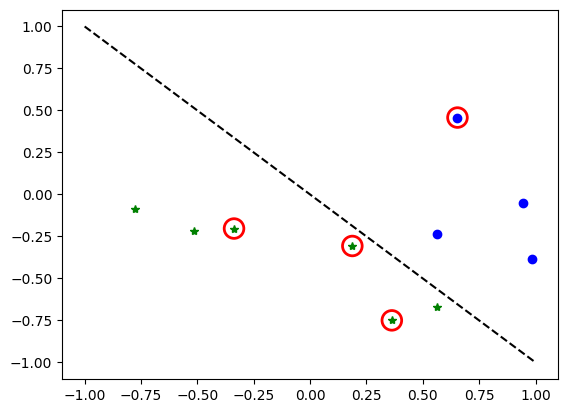

In [14]:
y_predict = estimator_classifier.predict(X_test)

for x, y_t, y_p in zip(X_test, y_test, y_predict):
    if y_t == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "g*")
    if y_t != y_p:
        plt.scatter(x[0], x[1], s=200, facecolor="none", edgecolors="r", linewidths=2)

plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()